<a href="https://colab.research.google.com/github/Shivanimarri/DELIVER-ON-TIME/blob/main/DAV_project1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Importing Dataset

In [ ]:
df = pd.read_csv('zomato.csv')

In [ ]:
df.head()

,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,...,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,...,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,...,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,...,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,...,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,...,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


ID: Unique identifier for each delivery.

Delivery_person_ID: Unique identifier for delivery personnel.

Delivery_person_Age: Age of the delivery person.

Delivery_person_Ratings: Ratings of the delivery person.

Restaurant_latitude/longitude: Latitude and longitude of the restaurant.

Delivery_location_latitude/longitude: Latitude and longitude of the delivery location.

Order_Date: Date when the order was placed.

Time_Ordered: Time when the order was placed.

Time_Order_picked: Time when the order was picked up by the delivery person.

Weather_conditions: Weather conditions during delivery.

Road_traffic_density: Traffic density during delivery.

Vehicle_condition: Condition of the delivery vehicle.

Type_of_order: Type of food order.

Type_of_vehicle: Vehicle used for delivery.

multiple_deliveries: Whether multiple deliveries were made during the trip.

Festival: Whether it was a festival day.

City: City where the delivery took place.

Time_taken (min): Time taken for delivery in minutes (target variable).

In [ ]:
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 45584
Number of columns: 21


In [ ]:
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
Unnamed: 0                       int64
ID                              object
Delivery_person_ID              object
Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weather_conditions              object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries            float64
Festival                        object
City                            object
Time_taken (min)                 int64
dtype: object


In [ ]:
print("\nSummary statistics for numerical features:")
print(df.describe())


Summary statistics for numerical features:
         Unnamed: 0  Delivery_person_Age  Delivery_person_Ratings  \
count  45584.000000         43730.000000             43676.000000   
mean   22791.500000            29.566911                 4.633774   
std    13159.111672             5.815064                 0.334744   
min        0.000000            15.000000                 1.000000   
25%    11395.750000            25.000000                 4.500000   
50%    22791.500000            30.000000                 4.700000   
75%    34187.250000            35.000000                 4.900000   
max    45583.000000            50.000000                 6.000000   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
count         45584.000000          45584.000000                45584.000000   
mean             17.017948             70.229684                   17.465480   
std               8.185674             22.885575                    7.335562   
min           

Removing unneccessary columns

In [ ]:
columns_to_drop = ['Unnamed: 0','ID', 'Delivery_person_ID', 'Order_Date',
                   'Time_Order_picked','Time_Orderd','Type_of_order']

df = df.drop(columns=columns_to_drop,axis=1)

Handling Null values

In [ ]:
missing_values = df.isnull().sum()

In [ ]:
columns_with_missing_values = missing_values[missing_values > 0]

In [ ]:
print("Columns with missing values:")
print(columns_with_missing_values)

Columns with missing values:
Delivery_person_Age        1854
Delivery_person_Ratings    1908
Weather_conditions          616
Road_traffic_density        601
multiple_deliveries         993
Festival                    228
City                       1200
dtype: int64


In [ ]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,motorcycle,3.0,No,Metropolitian,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,motorcycle,1.0,No,Metropolitian,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,scooter,1.0,No,Metropolitian,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,motorcycle,0.0,No,Metropolitian,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,scooter,1.0,No,Metropolitian,41


In [ ]:
df = df.dropna()

In [ ]:
df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].mean(), inplace=True)

In [ ]:
categorical_columns = ['Weather_conditions', 'Road_traffic_density', 'multiple_deliveries', 'Festival', 'City']
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

Handling Duplicate values

In [ ]:
duplicate_rows = df.duplicated()

In [ ]:
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 2


Handling Datatypes

In [ ]:
df['Weather_conditions'] = df['Weather_conditions'].astype('category')
df['Road_traffic_density'] = df['Road_traffic_density'].astype('category')
df['Vehicle_condition'] = df['Vehicle_condition'].astype('category')
df['Type_of_vehicle'] = df['Type_of_vehicle'].astype('category')
df['Festival'] = df['Festival'].astype('category')
df['City'] = df['City'].astype('category')

In [ ]:
print(df.dtypes)

Delivery_person_Age             float64
Delivery_person_Ratings         float64
Restaurant_latitude             float64
Restaurant_longitude            float64
Delivery_location_latitude      float64
Delivery_location_longitude     float64
Weather_conditions             category
Road_traffic_density           category
Vehicle_condition              category
Type_of_vehicle                category
multiple_deliveries             float64
Festival                       category
City                           category
Time_taken (min)                  int64
dtype: object


Handling Outliers

In [ ]:
for i in df.columns:
   print(f'{i}:{df[i].dtype}')
   unique_value=df[i].unique()
   print(unique_value)
   print('\n')

Delivery_person_Age:float64
[36. 21. 23. 34. 24. 29. 35. 33. 25. 31. 37. 27. 32. 26. 38. 20. 22. 28.
 39. 30.]


Delivery_person_Ratings:float64
[4.2 4.7 4.3 4.5 4.  4.1 5.  4.8 4.9 3.5 4.6 4.4 3.8 3.9 3.7 2.6 2.5 3.6
 3.1 2.7 3.2 3.3 3.4 2.8 2.9 3. ]


Restaurant_latitude:float64
[ 30.327968  10.003064  18.56245   30.899584  26.463504  19.176269
  12.311072  18.592718  22.552672  18.563934  23.357804  11.003669
  12.986047  19.221315  13.005801  26.849596  21.160522  12.934179
  18.51421   11.022477  21.160437  15.51315   15.561295   0.
  18.55144   18.593481  21.173343  17.451976  12.972532  13.064181
  21.149569  19.091458  22.539129  12.970324  21.175975  23.369746
  12.914264  11.003681  10.96185   27.165108  26.913987  12.3085
  21.183434  19.254567  25.449659  30.372202  12.972793  21.157735
  21.186438  17.431477  12.933298  22.311358  12.934365  13.086438
  26.913483  17.411028  15.5696    19.876428  12.939496  17.433809
  23.374878 -27.163303  22.74806   26.891191  12.316967 

Boxplot


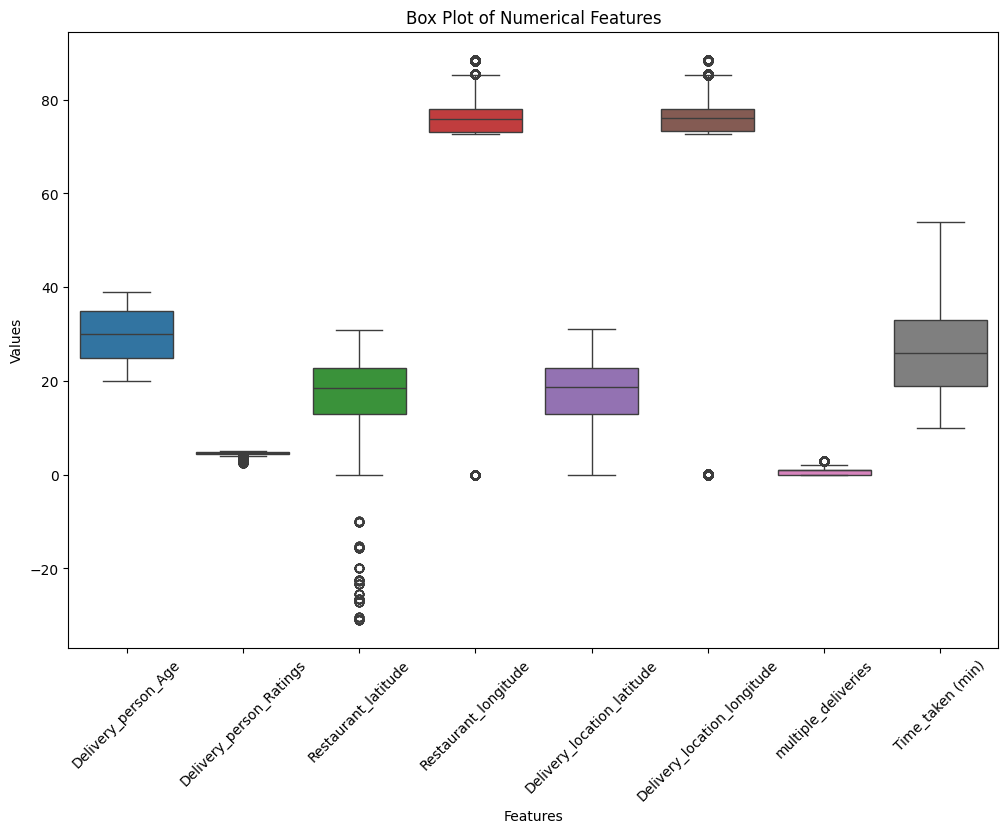

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_columns)
plt.xticks(rotation=45)
plt.title('Box Plot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [ ]:
df=df.drop(df[df['Delivery_person_Ratings']==6.0].index)

Handling Zero values

In [ ]:
rlatitude=(df['Restaurant_latitude']==0).sum()
print(rlatitude)

3304


In [ ]:
rlongitude=(df['Restaurant_longitude']==0).sum()
print(rlongitude)

3304


In [ ]:
dlatitude=(df['Delivery_location_latitude']==0).sum()
print(dlatitude)

0


In [ ]:
dlongitude=(df['Delivery_location_longitude']==0).sum()
print(dlongitude)

0


In [ ]:
m_latitude=df['Restaurant_latitude'].median()
df['Restaurant_latitude'].fillna(m_latitude,inplace=True)

In [ ]:
m_longitude=df['Restaurant_longitude'].median()
df['Restaurant_longitude'].fillna(m_longitude,inplace=True)

Feature Engineering

In [ ]:
R= 6371
def deg_to_rad(degrees):
  return degrees*(np.pi/180)

In [ ]:
def distcalculate(lat1, lon1, lat2, lon2):
  d_lat= deg_to_rad(lat2-lat1)
  d_lon= deg_to_rad(lon2-lon1)
  a= np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1))*np.cos(deg_to_rad(lat2))*np.sin(d_lon/2)**2
  c= 2*np.arctan2(np.sqrt(a), np.sqrt(1-a))
  return R*c

In [ ]:
df['distance'] = df.apply(lambda row: distcalculate(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)

In [ ]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,motorcycle,3.0,No,Metropolitian,46,10.280582
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,motorcycle,1.0,No,Metropolitian,23,6.242319
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,scooter,1.0,No,Metropolitian,21,13.787860
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,motorcycle,0.0,No,Metropolitian,20,2.930258
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,scooter,1.0,No,Metropolitian,41,19.396618


In [ ]:
columns_to_drop1 = ['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']

df = df.drop(columns=columns_to_drop1,axis=1)

In [ ]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,36.0,4.2,Fog,Jam,2,motorcycle,3.0,No,Metropolitian,46,10.280582
1,21.0,4.7,Stormy,High,1,motorcycle,1.0,No,Metropolitian,23,6.242319
2,23.0,4.7,Sandstorms,Medium,1,scooter,1.0,No,Metropolitian,21,13.787860
3,34.0,4.3,Sandstorms,Low,0,motorcycle,0.0,No,Metropolitian,20,2.930258
4,24.0,4.7,Fog,Jam,1,scooter,1.0,No,Metropolitian,41,19.396618


Relationship between Features and Time Taken

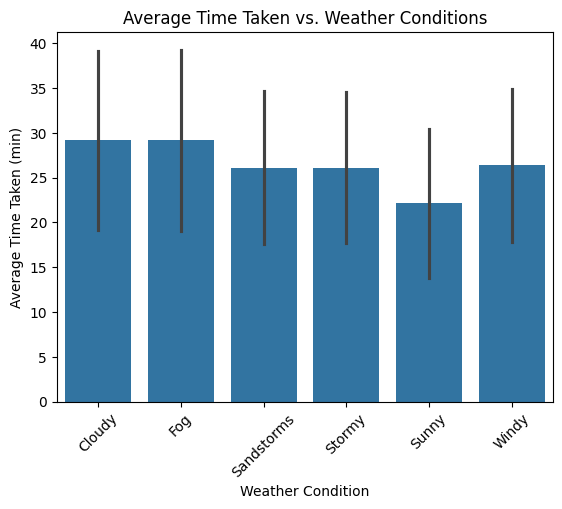

In [ ]:
sns.barplot(x='Weather_conditions', y='Time_taken (min)', data=df, errorbar='sd')
plt.title('Average Time Taken vs. Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Average Time Taken (min)')
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.show()

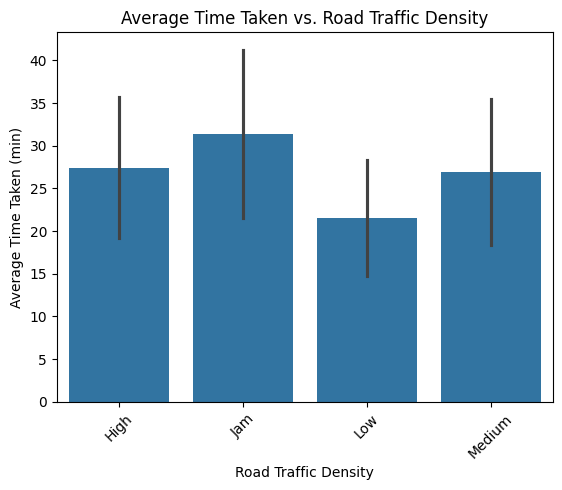

In [ ]:
sns.barplot(x='Road_traffic_density', y='Time_taken (min)', data=df, errorbar='sd')
plt.title('Average Time Taken vs. Road Traffic Density')
plt.xlabel('Road Traffic Density')
plt.ylabel('Average Time Taken (min)')
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.show()

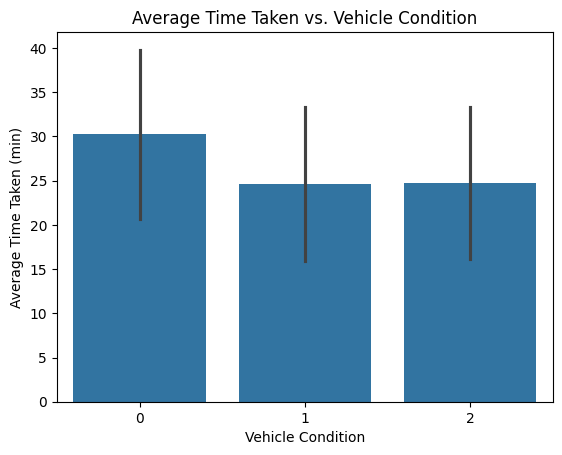

In [ ]:
sns.barplot(x='Vehicle_condition', y='Time_taken (min)', data=df, errorbar='sd')
plt.title('Average Time Taken vs. Vehicle Condition')
plt.xlabel('Vehicle Condition')
plt.ylabel('Average Time Taken (min)')
plt.show()

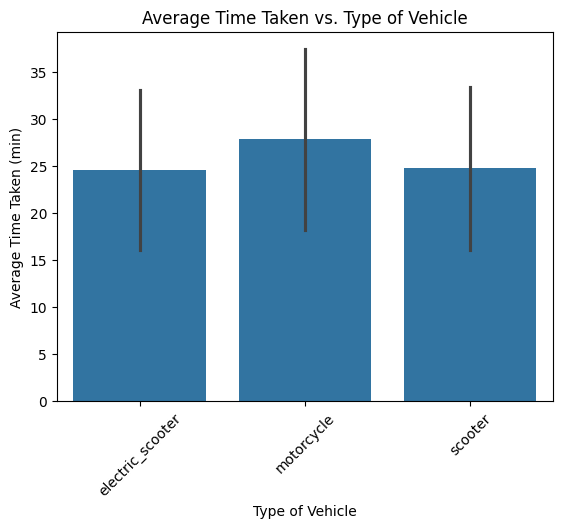

In [ ]:
sns.barplot(x='Type_of_vehicle', y='Time_taken (min)', data=df, errorbar='sd')
plt.title('Average Time Taken vs. Type of Vehicle')
plt.xlabel('Type of Vehicle')
plt.ylabel('Average Time Taken (min)')
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.show()

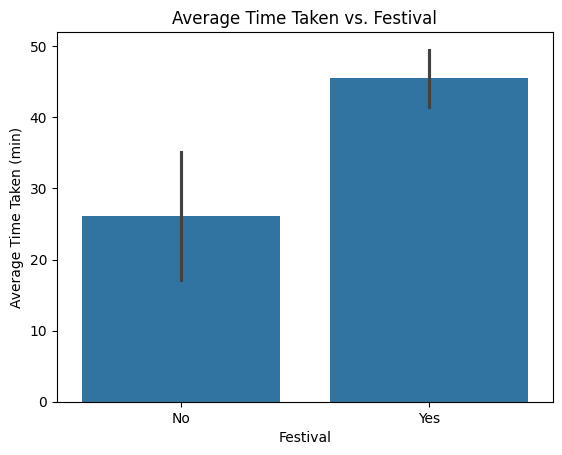

In [ ]:
sns.barplot(x='Festival', y='Time_taken (min)', data=df, errorbar='sd')
plt.title('Average Time Taken vs. Festival')
plt.xlabel('Festival')
plt.ylabel('Average Time Taken (min)')
plt.show()

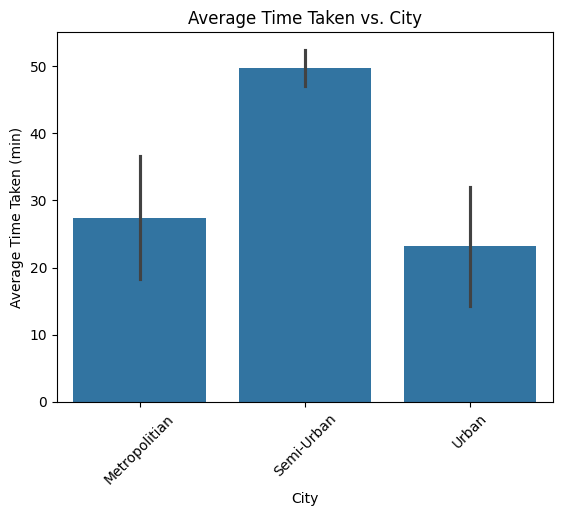

In [ ]:
sns.barplot(x='City', y='Time_taken (min)', data=df, errorbar='sd')
plt.title('Average Time Taken vs. City')
plt.xlabel('City')
plt.ylabel('Average Time Taken (min)')
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.show()


Correlation Heatmap of Features

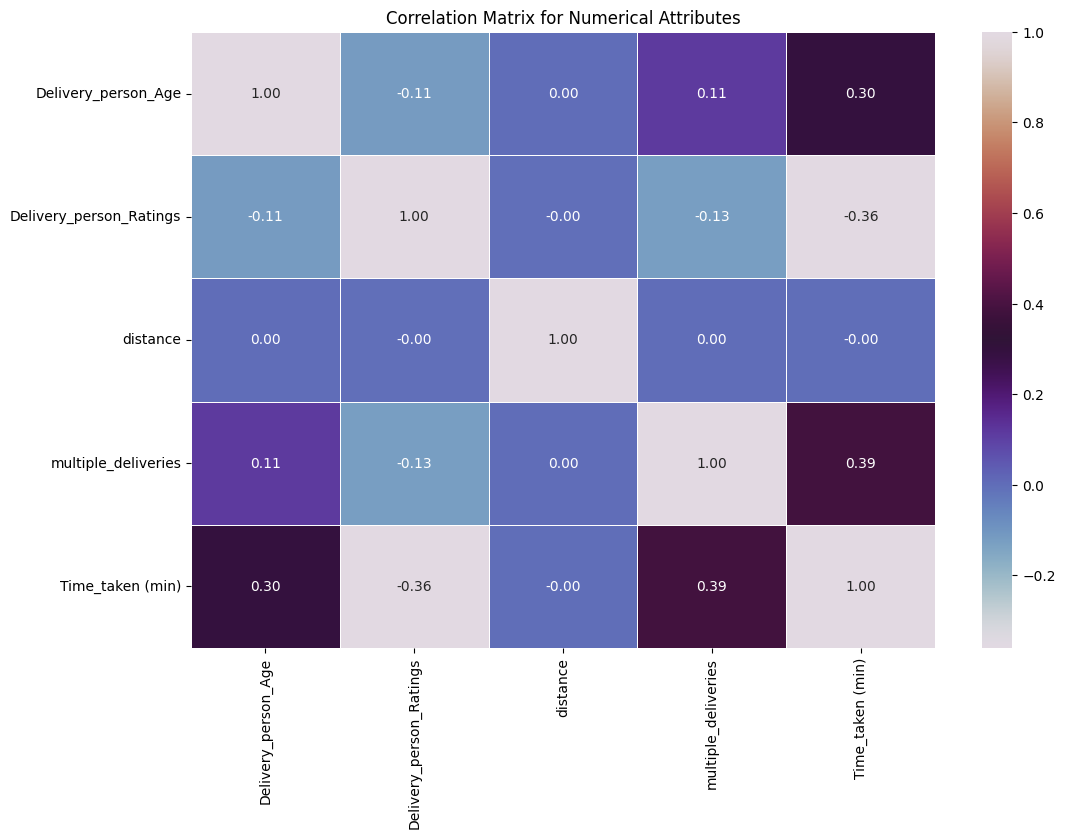

In [ ]:
numerical_columns = ['Delivery_person_Age', 'Delivery_person_Ratings','distance',
                     'multiple_deliveries', 'Time_taken (min)']

# Compute the correlation matrix for numerical attributes
corr_matrix = df[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='twilight', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Numerical Attributes')
plt.show()